## Capstone Project - The Battle of Neighborhoods (Week 2)

### Opening of Laundromat Services in Toronto City

The huge influx of visitors has propelled the burgeoning demand on hotels and hostels in the region. With the growth in travel accommodations, laundry services would also be increasingly in demand. Investors interested in a business with low investment and high return can look to the business of Laundromats in a city with a high tourist volume, such as Toronto. Tourists would often favour a cheaper alternative than hotel laundry services, which explains the mushrooming of Laundromats in tourist-rich cities. 
Therefore, the problem statement is: 
#### What is the best/most optimal place to set up a Laundromat in the city of Toronto that is in close proximity to travel accommodations and preferably at a distance from other competing Laundromats?

Our main goal is to get optimum location for new Laundromat business in Toronto City for ABC Company.Various factors need to be studied and various questions need to be answered in order to decide on the Location such as :
 - Toronto Population
 - Toronto City Demographics
 - Are there any Hotels nearby so that the service can be extended to the Hotel dwellers with quality and cost?
 - Are there any venues the locations of travel accommodations such as hostels and motels in the region so that the travellers can avail this service?
 - Who are the competitors in that location?
 - Types of Services of the competitors
 - Segmentation of the Borough - both demographic and psychographic  (lifestyle)
 
The objective is to locate and recommend to the management which neighborhood of Toronto City will be best choice to start a Laundromat  after due diligence of environment analysis. This would interest anyone who wants to start a new Laundromat in Toronto City. 


### 1. Create pandas dataframe of Neighborhoods in Toronto
### Importing necessary libraries

In [2]:
from bs4 import BeautifulSoup
import pandas as pd
import requests
# import k-means from clustering stage
from sklearn.cluster import KMeans
import numpy as np
!conda install -c conda-forge folium=0.5.0 --yes
import folium # map rendering library
!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2019.11.28         |           py36_0         149 KB  conda-forge
    openssl-1.1.1d             |       h516909a_0         2.1 MB  conda-forge
    branca-0.3.1               |             py_0          25 KB  conda-forge
    altair-3.3.0               |           py36_0         747 KB  conda-forge
    ca-certificates-2019.11.28 |       hecc5488_0         145 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         3.2 MB

The following NEW packages will be 

#### Extracting the html file from the URL of postal codes of Canada

In [3]:
url = 'https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'
r = requests.get(url).text

#### Using BeautifulSoup to find the table rows containing the postcode info

In [4]:
soup = BeautifulSoup(r,'lxml')
btable = soup.find('table')
tab_rows = btable.find_all('tr')

#### Creating the pandas dataframe and populating it with info from the html
(with processing of Not assigned and duplicate postal code rows)

In [5]:
column_names = ['PostalCode', 'Borough', 'Neighborhood']  # Setting the columns for the new pandas dataframe
postcodes = pd.DataFrame(columns=column_names)

for n in range(1,len(tab_rows)):
    row_t = tab_rows[n].text.split('\n')
    if row_t[2] != 'Not assigned':  # Skip rows with 'Not assigned' Boroughs
        if row_t[3] == 'Not assigned':  # Copying Borough name to 'Not assigned' Neighborhoods
            row_t[3] = row_t[2]
        if row_t[1] in postcodes.loc[:,'PostalCode'].unique():  # Appending the Neighborhood names to duplicate PostalCode areas
            postcodes.loc[tag,'Neighborhood'] = postcodes.loc[tag,'Neighborhood'] + ', ' + row_t[3]
        else: 
            postcodes.loc[n,:] = row_t[1:4]
            tag = n

postcodes.reset_index(drop=True,inplace=True)
postcodes.head()

,PostalCode,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,Harbourfront
3,M6A,North York,"Lawrence Heights, Lawrence Manor"
4,M7A,Queen's Park,Queen's Park


#### Print the number of rows of the dataframe

In [6]:
print('The shape of the dataframe: ',postcodes.shape)

The shape of the dataframe:  (103, 3)


#### Downloading csv file that has the geographical coordinates of each postal code

In [7]:
import csv

!wget -q -O Geospatial_Coordinates.csv http://cocl.us/Geospatial_data
print('Data downloaded!')

# read csv file
coord = pd.read_csv('Geospatial_Coordinates.csv')
coord.head()

Data downloaded!


,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


#### Match the Postal Codes to the coordinate values to populate the dataframe

In [8]:
for i,n in enumerate(postcodes['PostalCode']):
    res = coord[coord['Postal Code']==n]
    postcodes.loc[i,'Latitude'] = res.Latitude.values
    postcodes.loc[i,'Longitude'] = res.Longitude.values

postcodes.head()

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,Harbourfront,43.654260,-79.360636
3,M6A,North York,"Lawrence Heights, Lawrence Manor",43.718518,-79.464763
4,M7A,Queen's Park,Queen's Park,43.662301,-79.389494


In [9]:
print('The dataframe has {} boroughs and {} neighborhoods.'.format( len(postcodes['Borough'].unique()), postcodes.shape[0] ) )

The dataframe has 11 boroughs and 103 neighborhoods.


### Exploring only neighborhoods in the burough of Central Toronto

In [10]:
central_toronto = postcodes[postcodes['Borough']=='Central Toronto'].reset_index(drop=True)
central_toronto

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M4N,Central Toronto,Lawrence Park,43.728020,-79.388790
1,M5N,Central Toronto,Roselawn,43.711695,-79.416936
2,M4P,Central Toronto,Davisville North,43.712751,-79.390197
3,M5P,Central Toronto,"Forest Hill North, Forest Hill West",43.696948,-79.411307
4,M4R,Central Toronto,North Toronto West,43.715383,-79.405678
5,M5R,Central Toronto,"The Annex, North Midtown, Yorkville",43.672710,-79.405678
6,M4S,Central Toronto,Davisville,43.704324,-79.388790
7,M4T,Central Toronto,"Moore Park, Summerhill East",43.689574,-79.383160
8,M4V,Central Toronto,"Deer Park, Forest Hill SE, Rathnelly, South Hi...",43.686412,-79.400049


### 2. Search for laundromats in the neighborhood of Central Toronto

#### Define Foursquare credentials and version

In [12]:
CLIENT_ID = 'MJPATH50OACM4Q4S5GTXBNFHZABITMIHSRPHNSFOXSFWDCNW'   #Foursquare ID
CLIENT_SECRET= '5OKOTO4FYPXFUC0054MXKHFPHHUU0HJTQDNRLUCZY4134PVR' #Foursquare Secret
VERSION = '20180605' # Foursquare API version

#### Define getNearbyLaundryVenues function for extracting Laundromat venues

In [13]:
def getNearbyLaundryVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        #print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/search?&client_id={}&client_secret={}&v={}&ll={},{}&query={}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng,
            'Laundromat Laundry',
            radius, 
            100)
            
        # make the GET request
        results = requests.get(url).json()["response"]['venues']
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['name'], 
            v['location']['lat'], 
            v['location']['lng'],  
            v['categories'][0]['name']) for v in results if v['categories']])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

#### Select a subset of neighborhoods and explore the nearby laundromats for each

In [22]:
laundro_venues = getNearbyLaundryVenues(central_toronto['Neighborhood'],central_toronto["Latitude"],central_toronto['Longitude'],2000)
laundro_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Lawrence Park,43.728020,-79.388790,Maytag Laundry Linens And Gifts,43.730241,-79.403576,Laundry Service
1,Roselawn,43.711695,-79.416936,Royal Forest Coin Laundry,43.701115,-79.425177,Laundry Service
2,Roselawn,43.711695,-79.416936,Bathurst Street Coin Laundry,43.723356,-79.430118,Laundry Service
3,Roselawn,43.711695,-79.416936,Empire Dry Cleaners & Laundry Services - Etob...,43.699698,-79.415735,Dry Cleaner
4,Roselawn,43.711695,-79.416936,Coin Laundry,43.724148,-79.430481,Laundry Service


### 3. Search for hotels, hostels and motels in the neighborhood of Toronto
#### Define getNearbyHotelVenues function for extracting Hotel venues

In [26]:
def getNearbyHotelVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        #print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/search?&client_id={}&client_secret={}&v={}&ll={},{}&query={}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng,
            'Hostel Hotel',
            radius, 
            100)
            
        # make the GET request
        results = requests.get(url).json()["response"]['venues']
        
        # return only relevant information for each nearby venue
        venues_list.append([( name,lat,lng, v['name'],v['location']['lat'], v['location']['lng'], v['categories'][0]['name']) for v in results if v['categories']])
        nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
        nearby_venues.columns = ['Neighborhood','Neighborhood Latitude','Neighborhood Longitude','Venue','Venue Latitude','Venue Longitude','Venue Category']
    
    return(nearby_venues)


In [27]:
hotel_venues = getNearbyHotelVenues(central_toronto['Neighborhood'],central_toronto["Latitude"],central_toronto['Longitude'],2000)
hotel_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Lawrence Park,43.728020,-79.388790,Hotel Wibke,43.707730,-79.395858,Speakeasy
1,Lawrence Park,43.728020,-79.388790,Best Western Roehampton Hotel & Suites,43.708878,-79.390880,Hotel
2,Lawrence Park,43.728020,-79.388790,Skyline Hotels & Resorts,43.707578,-79.395640,Office
3,Roselawn,43.711695,-79.416936,Hotel Gelato,43.703478,-79.414311,Café
4,Roselawn,43.711695,-79.416936,Hotel Wibke,43.707730,-79.395858,Speakeasy


### 4. Perform hierarchical clustering on laundromat and hotel locations in Central Toronto
#### Generate Folium map (assuming Toronto city hall as the centre of Toronto) to show the locations of laundromats and hotels

In [41]:
address = 'Toronto, ON'
geolocator = Nominatim(user_agent="Toronto")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 43.653963, -79.387207.


In [28]:
#Passing Toronto coordinates as 43.653963, -79.387207
tor_latitude = 43.653963
tor_longitude = -79.387207.

# create map
map_clusters = folium.Map(location=[tor_latitude, tor_longitude], zoom_start=12)

# add markers to the map
markers_colors = []
for lat, lon, poi in zip(laundro_venues['Venue Latitude'], laundro_venues['Venue Longitude'], laundro_venues['Venue']):
    label = folium.Popup(str(poi), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.7).add_to(map_clusters)
    
for lat, lon, poi in zip(hotel_venues['Venue Latitude'], hotel_venues['Venue Longitude'], hotel_venues['Venue']):
    label = folium.Popup(str(poi), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='red',
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

#### Tabulate coordinates of laundromats and hotels

In [29]:
laundro_feature = laundro_venues[['Venue Latitude','Venue Longitude']]
hotel_feature = hotel_venues[['Venue Latitude','Venue Longitude']]

#### Perform hierarchical clustering to group nearby laundromats and hotels

In [30]:
from sklearn.preprocessing import MinMaxScaler
laundro_data = laundro_feature.values #returns a numpy array
hotel_data = hotel_feature.values
min_max_scaler = MinMaxScaler()
laundro_mtx = min_max_scaler.fit_transform(laundro_data)
hotel_mtx = min_max_scaler.fit_transform(hotel_data)
laundro_mtx [0:5]

array([[1.        , 0.3904177 ],
       [0.6288908 , 0.09697779],
       [0.91227002, 0.02986149],
       [0.61082873, 0.22524311],
       [0.9223651 , 0.02492547]])

In [31]:
import scipy
laundro_leng = laundro_mtx.shape[0]
laundro_D = scipy.zeros([laundro_leng,laundro_leng])
for i in range(laundro_leng):
    for j in range(laundro_leng):
        laundro_D[i,j] = scipy.spatial.distance.euclidean(laundro_mtx[i], laundro_mtx[j])
        
print(laundro_D)

[[0.         0.47310571 0.3710759  ... 0.8358833  0.75830948 0.37579332]
 [0.47310571 0.         0.29121879 ... 0.7289435  0.40192747 0.49889405]
 [0.3710759  0.29121879 0.         ... 0.96253584 0.69132031 0.60775833]
 ...
 [0.8358833  0.7289435  0.96253584 ... 0.         0.45895701 0.47154443]
 [0.75830948 0.40192747 0.69132031 ... 0.45895701 0.         0.55083028]
 [0.37579332 0.49889405 0.60775833 ... 0.47154443 0.55083028 0.        ]]


In [33]:
# Import libraries
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 
import pylab
import scipy.cluster.hierarchy
from scipy.cluster.hierarchy import fcluster

# Perform clustering
laundro_Z = hierarchy.linkage(laundro_D, 'complete')
max_d = 3
laundro_clusters = fcluster(laundro_Z, max_d, criterion='distance')
laundro_dend = hierarchy.dendrogram(laundro_Z)


/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:9: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix


In [34]:
hotel_leng = hotel_mtx.shape[0]
hotel_D = scipy.zeros([hotel_leng,hotel_leng])
for i in range(hotel_leng):
    for j in range(hotel_leng):
        hotel_D[i,j] = scipy.spatial.distance.euclidean(hotel_mtx[i], hotel_mtx[j])
        
print(hotel_D)

[[0.         0.11496622 0.00561036 ... 0.70466877 0.63880283 0.63874749]
 [0.11496622 0.         0.11058236 ... 0.7590232  0.64457599 0.65807007]
 [0.00561036 0.11058236 0.         ... 0.70337434 0.63521127 0.63570043]
 ...
 [0.70466877 0.7590232  0.70337434 ... 0.         0.31381699 0.23710913]
 [0.63880283 0.64457599 0.63521127 ... 0.31381699 0.         0.07677343]
 [0.63874749 0.65807007 0.63570043 ... 0.23710913 0.07677343 0.        ]]


/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:2: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  from ipykernel import kernelapp as app


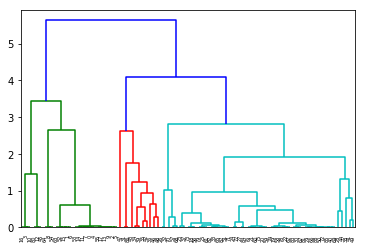

In [35]:
# Perform clustering
hotel_Z = hierarchy.linkage(hotel_D, 'complete')
max_d = 3
hotel_clusters = fcluster(hotel_Z, max_d, criterion='distance')
hotel_dend = hierarchy.dendrogram(hotel_Z)

### 5. Find suitable location for new laundromat
#### Append the cluster numbers to the laundromat and hotel dataframes

In [36]:
laundro_venues['cluster_'] = laundro_clusters
hotel_venues['cluster_'] = hotel_clusters

#### Generate a Folium map to illustrate the clusters of laundromats and hotels (reds: Laundromats, blues: Hotels)

In [37]:
#Passing Toronto coordinates as 43.653963, -79.387207
tor_latitude =  43.653963
tor_longitude = -79.387207

# create map
map_clusters = folium.Map(location=[tor_latitude, tor_longitude], zoom_start=12)

# set color scheme for the laundromat clusters
laundro_kclusters = laundro_clusters.max()
x = np.arange(laundro_kclusters)
ys = [i+x+(i*x)**2 for i in range(laundro_kclusters)]
colors_array = cm.rainbow(np.linspace(0.8, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(laundro_venues['Venue Latitude'], laundro_venues['Venue Longitude'], laundro_venues['Venue'], laundro_venues['cluster_']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
 # set color scheme for the hotel clusters
hotel_kclusters = hotel_clusters.max()
x = np.arange(hotel_kclusters)
ys = [i+x+(i*x)**2 for i in range(hotel_kclusters)]
colors_array = cm.rainbow(np.linspace(0.1, 0.3, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(hotel_venues['Venue Latitude'], hotel_venues['Venue Longitude'], hotel_venues['Venue'], hotel_venues['cluster_']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters   

#### Extracting the coordinate of cluster centers for better visualisation of laundromat and hotel hotspots around Central Toronto

In [38]:
laundro_mean = pd.DataFrame(columns=['Venue Latitude','Venue Longitude'])
laundro_count = pd.DataFrame(columns=['Number of Venues'])
hotel_mean = pd.DataFrame(columns=['Venue Latitude','Venue Longitude'])
hotel_count = pd.DataFrame(columns=['Number of Venues'])

for i in range(1,laundro_kclusters+1):
    laundro_mean.loc[i-1,:]=laundro_venues[laundro_venues['cluster_']==i][['Venue Latitude','Venue Longitude']].mean()
    laundro_count.loc[i-1] = laundro_venues[laundro_venues['cluster_']==i]['cluster_'].count()

for i in range(1,hotel_kclusters+1):
    hotel_mean.loc[i-1,:]=hotel_venues[hotel_venues['cluster_']==i][['Venue Latitude','Venue Longitude']].mean()
    hotel_count.loc[i-1] = hotel_venues[hotel_venues['cluster_']==i]['cluster_'].count()
    
laundro_mean = pd.concat([laundro_mean, laundro_count], axis=1, sort=False)
hotel_mean = pd.concat([hotel_mean, hotel_count], axis=1, sort=False)
print('Laundromat clusters: \n',laundro_mean)
print('Hotel clusters: \n',hotel_mean)

Laundromat clusters: 
   Venue Latitude Venue Longitude Number of Venues
0        43.7271        -79.4236               11
1         43.705        -79.3884               12
2        43.6683         -79.379               12
3        43.6897        -79.4228               20
4        43.6769        -79.4002               29
5        43.6632        -79.4126               28
Hotel clusters: 
   Venue Latitude Venue Longitude Number of Venues
0        43.6959        -79.4155                6
1        43.7075        -79.3911               20
2        43.6578        -79.4022               11
3        43.6696        -79.3909               52


#### Generating Folium map with showing laundromat and hotel clusters, with larger circles representing a higher concentration of venues
(Reds: Laundromats, Blues: Hotels)

In [39]:
# Assuming Toronto coordinates as 43.653170, -79.383541
tor_latitude = 43.653170
tor_longitude = -79.383541

# create map
map_center_clusters = folium.Map(location=[tor_latitude, tor_longitude], zoom_start=12)

# set color scheme for the laundromat clusters
laundro_kclusters = laundro_clusters.max()
x = np.arange(laundro_kclusters)
ys = [i+x+(i*x)**2 for i in range(laundro_kclusters)]
colors_array = cm.rainbow(np.linspace(0.8, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
scale_laundry = laundro_mean['Number of Venues'].max()
for lat, lon, clustsize, clustnum in zip(laundro_mean['Venue Latitude'], laundro_mean['Venue Longitude'], laundro_mean['Number of Venues'],laundro_mean.index):
    label = folium.Popup(' Laundromat Cluster ' + str(clustnum+1), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=clustsize/scale_laundry*30,
        popup=label,
        color=rainbow[clustnum],
        fill=True,
        fill_color=rainbow[clustnum],
        fill_opacity=0.7).add_to(map_center_clusters)
# set color scheme for the hotel clusters
hotel_kclusters = hotel_clusters.max()
x = np.arange(hotel_kclusters)
ys = [i+x+(i*x)**2 for i in range(hotel_kclusters)]
colors_array = cm.rainbow(np.linspace(0.1, 0.3, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
scale_hotel = hotel_mean['Number of Venues'].max()
for lat, lon, clustsize, clustnum in zip(hotel_mean['Venue Latitude'], hotel_mean['Venue Longitude'], hotel_mean['Number of Venues'], hotel_mean.index):
    label = folium.Popup(' Hotel Cluster ' + str(clustnum+1), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=clustsize/scale_hotel*30,
        popup=label,
        color=rainbow[clustnum],
        fill=True,
        fill_color=rainbow[clustnum],
        fill_opacity=0.7).add_to(map_center_clusters)
       
map_center_clusters    